## Importamos librerías

In [2]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np

## Descargamos los datos de imdb - Keras

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 11s 1us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[1]

0

### Diccionario de palabras

In [6]:
word_index = imdb.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

1654784/1641221 [==============================] - 1s 1us/step


In [7]:
for _ in train_data[0]:
    print(word_index.get( _ - 3))# le quitamos los 3 primeros indecies por que son reservados

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

## Función de one-hot encoding

In [8]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults    

## Transformamos datos

In [9]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Creamos el modelo

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',## version por defecto y mejorada de desenso de gradiente
              loss='binary_crossentropy', #funcion de perdidad
             metrics=['acc'])

# Separando los datos de validacion (opcion 1)

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando

In [22]:
history1 = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/5
30/30 [==============================] - 1s 20ms/step - loss: 0.0071 - acc: 0.9990 - val_loss: 0.6890 - val_acc: 0.8648
Epoch 2/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0029 - acc: 0.9999 - val_loss: 0.7349 - val_acc: 0.8642
Epoch 3/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0068 - acc: 0.9979 - val_loss: 0.7694 - val_acc: 0.8646
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.7990 - val_acc: 0.8634
Epoch 5/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0049 - acc: 0.9985 - val_loss: 0.8405 - val_acc: 0.8623


# Separando los datos de validacion (opcion 2)

In [38]:
history2 = model.fit(x_train,
                   y_train,
                   epochs=5,
                   batch_size=512,
                   validation_split=0.3)

Epoch 1/5
35/35 [==============================] - 1s 17ms/step - loss: 9.6768e-09 - acc: 1.0000 - val_loss: 0.7872 - val_acc: 0.9343
Epoch 2/5
35/35 [==============================] - 0s 12ms/step - loss: 8.8423e-09 - acc: 1.0000 - val_loss: 0.7916 - val_acc: 0.9345
Epoch 3/5
35/35 [==============================] - 0s 12ms/step - loss: 8.1320e-09 - acc: 1.0000 - val_loss: 0.7954 - val_acc: 0.9341
Epoch 4/5
35/35 [==============================] - 0s 13ms/step - loss: 7.5306e-09 - acc: 1.0000 - val_loss: 0.7995 - val_acc: 0.9341
Epoch 5/5
35/35 [==============================] - 0s 12ms/step - loss: 7.0064e-09 - acc: 1.0000 - val_loss: 0.8026 - val_acc: 0.9340


## Analizamos resultados

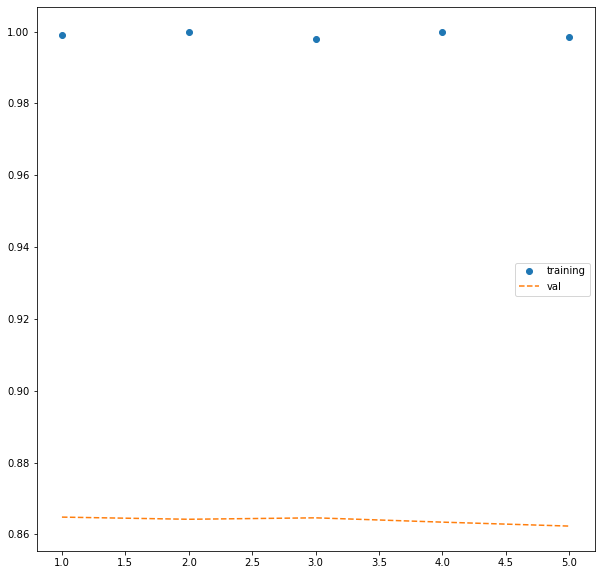

In [39]:
import matplotlib.pyplot as plt 

history_dict = history1.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

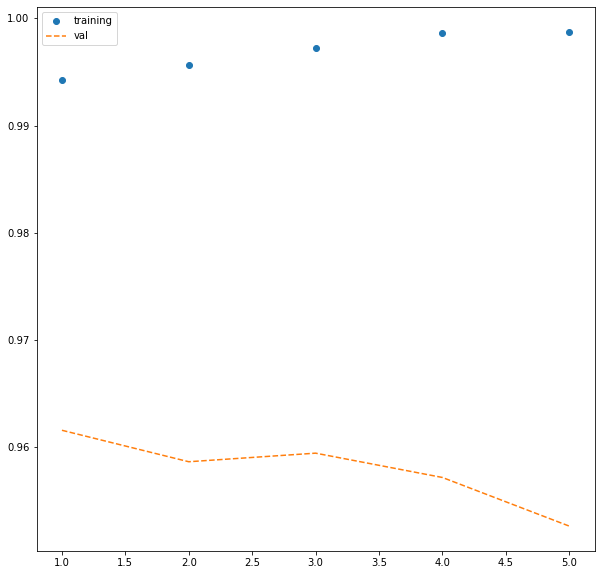

In [33]:
history_dict = history2.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [34]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 1.1646 - acc: 0.8524


[1.1645745038986206, 0.8523600101470947]

## Predicciones

In [18]:
predictions = model.predict(x_test)

In [19]:
predictions[1]

array([0.99999404], dtype=float32)

# Sin duda podemos ver como hay un sobre entrenamiento en nuestra red neuronal, para reducir esto haremos Regularizacion y Dropout

## Creando un modelo mas pequeno

In [46]:
history = model.fit(x_train,
                   y_train,
                   epochs=20,
                   batch_size=512,
                   validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 1s 17ms/step - loss: 3.0236e-09 - acc: 1.0000 - val_loss: 0.8453 - val_acc: 0.9339
Epoch 2/20
35/35 [==============================] - 0s 12ms/step - loss: 2.9633e-09 - acc: 1.0000 - val_loss: 0.8466 - val_acc: 0.9339
Epoch 3/20
35/35 [==============================] - 0s 12ms/step - loss: 2.8918e-09 - acc: 1.0000 - val_loss: 0.8479 - val_acc: 0.9339
Epoch 4/20
35/35 [==============================] - 0s 12ms/step - loss: 2.8355e-09 - acc: 1.0000 - val_loss: 0.8491 - val_acc: 0.9339
Epoch 5/20
35/35 [==============================] - 0s 14ms/step - loss: 2.7719e-09 - acc: 1.0000 - val_loss: 0.8501 - val_acc: 0.9340
Epoch 6/20
35/35 [==============================] - 0s 12ms/step - loss: 2.7209e-09 - acc: 1.0000 - val_loss: 0.8514 - val_acc: 0.9339
Epoch 7/20
35/35 [==============================] - 0s 12ms/step - loss: 2.6675e-09 - acc: 1.0000 - val_loss: 0.8527 - val_acc: 0.9336
Epoch 8/20
35/35 [==============================] - 0s 

In [47]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [49]:
history2 = model2.fit(x_train,
                   y_train,
                   epochs=20,
                   batch_size=512,
                   validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 1s 17ms/step - loss: 0.6439 - acc: 0.6445 - val_loss: 0.5792 - val_acc: 0.6860
Epoch 2/20
35/35 [==============================] - 0s 11ms/step - loss: 0.5092 - acc: 0.8482 - val_loss: 0.4502 - val_acc: 0.8664
Epoch 3/20
35/35 [==============================] - 0s 11ms/step - loss: 0.3847 - acc: 0.8964 - val_loss: 0.3633 - val_acc: 0.8855
Epoch 4/20
35/35 [==============================] - 0s 12ms/step - loss: 0.3052 - acc: 0.9113 - val_loss: 0.3166 - val_acc: 0.8868
Epoch 5/20
35/35 [==============================] - 0s 11ms/step - loss: 0.2537 - acc: 0.9219 - val_loss: 0.2908 - val_acc: 0.8901
Epoch 6/20
35/35 [==============================] - 0s 11ms/step - loss: 0.2176 - acc: 0.9310 - val_loss: 0.2749 - val_acc: 0.8935
Epoch 7/20
35/35 [==============================] - 0s 11ms/step - loss: 0.1914 - acc: 0.9386 - val_loss: 0.2686 - val_acc: 0.8935
Epoch 8/20
35/35 [==============================] - 0s 11ms/step - loss: 0.1701 - a

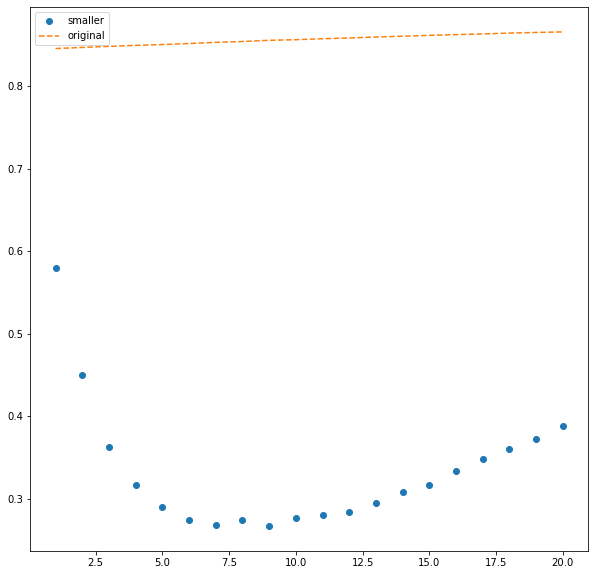

In [50]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

## Regularizacion

In [51]:
from keras import regularizers

In [52]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [53]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [54]:
history3 = model3.fit(x_train,
                   y_train,
                   epochs=20,
                   batch_size=512,
                   validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 1s 19ms/step - loss: 0.5693 - acc: 0.8110 - val_loss: 0.4479 - val_acc: 0.8640
Epoch 2/20
35/35 [==============================] - 0s 13ms/step - loss: 0.3759 - acc: 0.8927 - val_loss: 0.3648 - val_acc: 0.8791
Epoch 3/20
35/35 [==============================] - 0s 13ms/step - loss: 0.3073 - acc: 0.9124 - val_loss: 0.3542 - val_acc: 0.8829
Epoch 4/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2748 - acc: 0.9235 - val_loss: 0.3295 - val_acc: 0.8903
Epoch 5/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2517 - acc: 0.9341 - val_loss: 0.3657 - val_acc: 0.8791
Epoch 6/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2398 - acc: 0.9381 - val_loss: 0.3363 - val_acc: 0.8881
Epoch 7/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2261 - acc: 0.9437 - val_loss: 0.3439 - val_acc: 0.8859
Epoch 8/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2159 - a

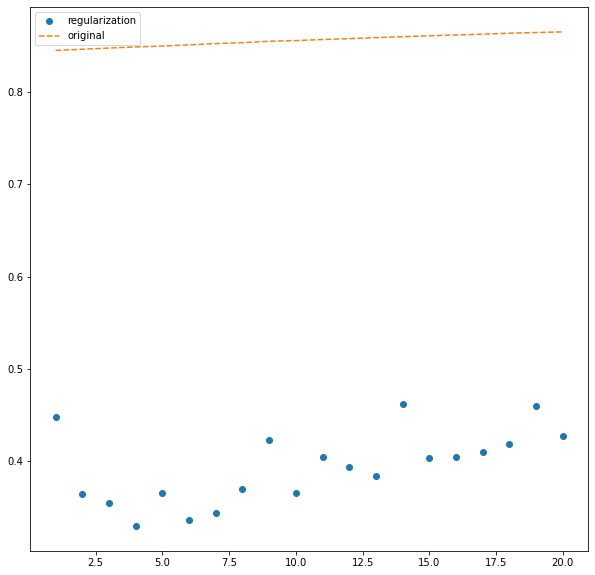

In [55]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values3 = history3.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

# Dropout

In [56]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

In [57]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [58]:
history4 = model4.fit(x_train,
                   y_train,
                   epochs=20,
                   batch_size=512,
                   validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 1s 19ms/step - loss: 0.6316 - acc: 0.6301 - val_loss: 0.5254 - val_acc: 0.8519
Epoch 2/20
35/35 [==============================] - 0s 13ms/step - loss: 0.5098 - acc: 0.7691 - val_loss: 0.4012 - val_acc: 0.8680
Epoch 3/20
35/35 [==============================] - 0s 13ms/step - loss: 0.4230 - acc: 0.8325 - val_loss: 0.3267 - val_acc: 0.8848
Epoch 4/20
35/35 [==============================] - 0s 13ms/step - loss: 0.3573 - acc: 0.8659 - val_loss: 0.2921 - val_acc: 0.8852
Epoch 5/20
35/35 [==============================] - 0s 14ms/step - loss: 0.3092 - acc: 0.8910 - val_loss: 0.2753 - val_acc: 0.8897
Epoch 6/20
35/35 [==============================] - 0s 12ms/step - loss: 0.2720 - acc: 0.9078 - val_loss: 0.2732 - val_acc: 0.8891
Epoch 7/20
35/35 [==============================] - 0s 12ms/step - loss: 0.2403 - acc: 0.9186 - val_loss: 0.2799 - val_acc: 0.8884
Epoch 8/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2188 - a

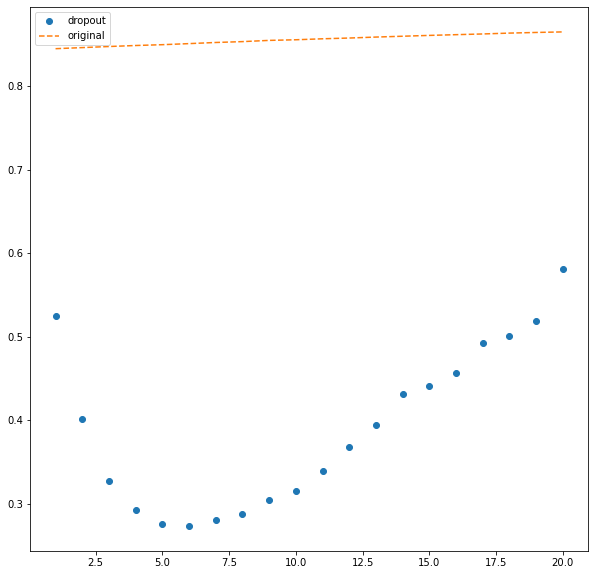

In [59]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()